Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
### Input date for analysis
from datetime import datetime
#
#anltdate="2021-XX-XX"
anltdate=datetime.today().strftime('%Y-%m-%d')
vanltdate="'''"+anltdate+"'''"
print(vanltdate)
configs = {"analytics_date":vanltdate}
#
### Input delta in folder :  /data
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_pred_new_cases',FloatType(),True),
       StructField('delta_pred_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_pred_new_cases', 'delta_pred_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').option("mergeSchema", "true").format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

'''2022-04-05'''
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+--------------------+-------------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_pred_new_cases|delta_pred_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+--------------------+---

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [2]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
from datetime import datetime
#
anltdate=datetime.today().strftime('%Y-%m-%d')
vanltdate="'''"+anltdate+"'''"
print(vanltdate)
configs = {"analytics_date":vanltdate}
#
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

'''2022-04-05'''
root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_pred_new_cases: float (nullable = true)
 |-- delta_pred_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [3]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
### Input date for analysis
from datetime import datetime
anltdate=datetime.today().strftime('%Y-%m-%d')
vanltdate="'''"+anltdate+"'''"
print(vanltdate)
configs = {"analytics_date":vanltdate}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

#sc.stop()
#exit()
import os 
# printing environment variables
print(os.environ)

'''2022-04-05'''
environ({'PACKAGES': 'io.delta:delta-core_2.11:0.5.0', 'HADOOP_HOME': '/home/notebookuser/spark/spark-2.4.5-bin-hadoop2.7', 'OLDPWD': '/home/notebookuser/notebooks/covid19/data', 'JAVA_HOME': '/usr/lib/jvm/default-java', 'PWD': '/home/notebookuser', 'HOME': '/home/notebookuser', 'SPARK_LOCAL_IP': '0.0.0.0', 'SPARK_HOME': '/home/notebookuser/spark/spark-2.4.5-bin-hadoop2.7', 'SHELL': '/bin/sh', 'PYSPARK_DRIVER_PYTHON': 'jupyter', 'SHLVL': '1', 'PYTHONPATH': '/home/notebookuser/spark/spark-2.4.5-bin-hadoop2.7/python/lib/py4j-0.10.7-src.zip:/home/notebookuser/spark/spark-2.4.5-bin-hadoop2.7/python:/home/notebookuser/spark/spark-2.4.5-bin-hadoop2.7/python/build:', 'PYSPARK_DRIVER_PYTHON_OPTS': 'notebook', 'LOGNAME': 'notebookuser', 'PYSPARK_PYTHON': '/home/notebookuser/anaconda3/bin/python', 'PATH': '/home/notebookuser/anaconda3/bin:/home/notebookuser/.local/bin:/usr/bin:/bin', 'PYSPARK_SUBMIT_ARGS': '--packages io.delta:delta-core_2.11:0.5.0  pyspark-shell', '_': '/home/n

### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [4]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

,date,region,confirmed,1_day_change,3_day_change,7_day_change,confirmed_yesterday,confirmed_prediction,population,population_percentage_infected_rate_confirmed,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab
0,2022-04-05,Afghanistan_nan,0,70.0,115.0,295.0,177897.0,177938.0,35530000.0,0.005007,0.045063,41.0,1.153954,42.142857,1.660568
1,2022-04-05,Albania_nan,0,43.0,154.0,481.0,273913.0,273993.0,2878445.0,0.095160,0.856443,80.0,27.792784,68.714287,33.420822
2,2022-04-05,Algeria_nan,0,3.0,15.0,53.0,265694.0,265705.0,41320000.0,0.006430,0.057872,11.0,0.266215,7.571429,0.256534
3,2022-04-05,Andorra_nan,0,0.0,0.0,311.0,40024.0,40093.0,77239.0,0.518190,1.000000,69.0,893.331116,44.428570,805.292664
4,2022-04-05,Angola_nan,0,0.0,0.0,79.0,99194.0,99214.0,32866272.0,0.003018,0.027163,20.0,0.608527,11.285714,0.480736


In [5]:
%%sql_display
select * from covid19_jh_analysis where region is not null and date >= {analytics_date}
  order by date desc, region asc limit 5

,date,region,confirmed,1_day_change,3_day_change,7_day_change,confirmed_yesterday,confirmed_prediction,population,population_percentage_infected_rate_confirmed,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab
0,2022-04-05,Afghanistan_nan,0,70.0,115.0,295.0,177897.0,177938.0,35530000.0,0.005007,0.045063,41.0,1.153954,42.142857,1.660568
1,2022-04-05,Albania_nan,0,43.0,154.0,481.0,273913.0,273993.0,2878445.0,0.095160,0.856443,80.0,27.792784,68.714287,33.420822
2,2022-04-05,Algeria_nan,0,3.0,15.0,53.0,265694.0,265705.0,41320000.0,0.006430,0.057872,11.0,0.266215,7.571429,0.256534
3,2022-04-05,Andorra_nan,0,0.0,0.0,311.0,40024.0,40093.0,77239.0,0.518190,1.000000,69.0,893.331116,44.428570,805.292664
4,2022-04-05,Angola_nan,0,0.0,0.0,79.0,99194.0,99214.0,32866272.0,0.003018,0.027163,20.0,0.608527,11.285714,0.480736


In [6]:
print(configs)

{'analytics_date': "'''2022-04-05'''"}


### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +10 cases a day AVG last 7days 

In [7]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10
order by delta_roling_7day_AVG desc, region asc
limit 60

,date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,1_day_change,3_day_change,7_day_change,confirmed_yesterday,population,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
0,2022-04-05,"Korea, South_nan",273853.281250,7448.894531,265995.0,627486.0,1916973.0,14267401.0,51470000.0,1.000000,305347.0,5932.523926
1,2022-04-05,United States_nan,213950.281250,904.918457,1340247.0,1355335.0,1497652.0,81495648.0,331002656.0,1.000000,-470285.0,-1420.789185
2,2022-04-05,Germany_nan,197507.140625,3339.896240,0.0,311638.0,1382550.0,21706328.0,82790000.0,1.000000,324885.0,3924.205811
3,2022-04-05,France_nan,136333.140625,2727.052490,27648.0,262028.0,954332.0,25330572.0,69990000.0,1.000000,196117.0,2802.071777
4,2022-04-05,Vietnam_nan,84599.429688,1239.681763,48717.0,216382.0,592196.0,9867045.0,95540000.0,0.929489,121182.0,1268.390259
5,2022-04-05,Italy_nan,68694.429688,1590.148804,31329.0,157750.0,480861.0,14877144.0,60480000.0,1.000000,88813.0,1468.468872
6,2022-04-05,United Kingdom_nan,64880.855469,1367.146240,142807.0,142807.0,454166.0,21359680.0,66440000.0,1.000000,43313.0,651.911499
7,2022-04-05,Japan_nan,46370.855469,511.981079,30017.0,125928.0,324596.0,6730654.0,126800000.0,0.477728,55111.0,434.629333
8,2022-04-05,Thailand_nan,26025.285156,527.743347,21088.0,72820.0,182177.0,3757575.0,69040000.0,0.489835,29608.0,428.852844
9,2022-04-05,Brazil_nan,22530.857422,148.397385,12572.0,36844.0,157716.0,30015356.0,212559008.0,1.000000,29788.0,140.139908


In [8]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG <= 1000 and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10
order by delta_roling_7day_AVG desc, region asc

,date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,1_day_change,3_day_change,7_day_change,confirmed_yesterday,population,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
0,2022-04-05,Bulgaria_nan,993.285706,199.821960,1180.0,1903.0,6953.0,1141859.0,6959195.0,1.000000,1016.0,145.993896
1,2022-04-05,Bhutan_nan,978.142883,1774.726196,490.0,2788.0,6847.0,31927.0,771612.0,0.372404,1043.0,1351.715576
2,2022-04-05,Estonia_nan,978.000000,1032.308228,427.0,1819.0,6846.0,559133.0,1326348.0,1.000000,1348.0,1016.324524
3,2022-04-05,Guatemala_nan,929.285706,72.199799,216.0,1268.0,6505.0,831149.0,18019440.0,0.415127,1381.0,76.639450
4,2022-04-05,Australia_Australian Capital Territory,914.285706,2968.356934,857.0,2306.0,6400.0,81821.0,431215.0,1.000000,1013.0,2349.176270
5,2022-04-05,Mauritius_nan,877.571411,964.375549,0.0,0.0,6143.0,210343.0,1273985.0,1.000000,1398.0,1097.344116
6,2022-04-05,Sweden_nan,873.714294,120.869568,0.0,0.0,6116.0,2487852.0,10120000.0,1.000000,1695.0,167.490112
7,2022-04-05,Belarus_nan,836.000000,123.852196,332.0,1898.0,5852.0,965654.0,9449974.0,0.919674,1214.0,128.465958
8,2022-04-05,Uruguay_nan,771.142883,311.020844,627.0,1501.0,5398.0,890140.0,3471150.0,1.000000,897.0,258.415802
9,2022-04-05,Cuba_nan,735.571411,90.906982,619.0,2103.0,5149.0,1093166.0,11328063.0,0.868507,856.0,75.564552


In [9]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

,date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,1_day_change,3_day_change,7_day_change,confirmed_yesterday,population,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
0,2022-04-05,"Korea, South_nan",273853.281250,7448.894531,265995.0,627486.0,1916973.0,14267401.0,51470000.0,1.000000,305347.0,5932.523926
1,2022-04-05,United States_nan,213950.281250,904.918457,1340247.0,1355335.0,1497652.0,81495648.0,331002656.0,1.000000,-470285.0,-1420.789185
2,2022-04-05,Germany_nan,197507.140625,3339.896240,0.0,311638.0,1382550.0,21706328.0,82790000.0,1.000000,324885.0,3924.205811
3,2022-04-05,France_nan,136333.140625,2727.052490,27648.0,262028.0,954332.0,25330572.0,69990000.0,1.000000,196117.0,2802.071777
4,2022-04-05,Vietnam_nan,84599.429688,1239.681763,48717.0,216382.0,592196.0,9867045.0,95540000.0,0.929489,121182.0,1268.390259
5,2022-04-05,Italy_nan,68694.429688,1590.148804,31329.0,157750.0,480861.0,14877144.0,60480000.0,1.000000,88813.0,1468.468872
6,2022-04-05,United Kingdom_nan,64880.855469,1367.146240,142807.0,142807.0,454166.0,21359680.0,66440000.0,1.000000,43313.0,651.911499
7,2022-04-05,Japan_nan,46370.855469,511.981079,30017.0,125928.0,324596.0,6730654.0,126800000.0,0.477728,55111.0,434.629333
8,2022-04-05,Thailand_nan,26025.285156,527.743347,21088.0,72820.0,182177.0,3757575.0,69040000.0,0.489835,29608.0,428.852844
9,2022-04-05,Brazil_nan,22530.857422,148.397385,12572.0,36844.0,157716.0,30015356.0,212559008.0,1.000000,29788.0,140.139908


### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [10]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

,date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,1_day_change,3_day_change,7_day_change,confirmed_yesterday,population,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
0,2022-04-05,"Korea, South_nan",273853.281250,7448.894531,265995.0,627486.0,1916973.0,14267401.0,51470000.0,1.000000,305347.0,5932.523926
1,2022-04-05,United States_nan,213950.281250,904.918457,1340247.0,1355335.0,1497652.0,81495648.0,331002656.0,1.000000,-470285.0,-1420.789185
2,2022-04-05,Germany_nan,197507.140625,3339.896240,0.0,311638.0,1382550.0,21706328.0,82790000.0,1.000000,324885.0,3924.205811
3,2022-04-05,France_nan,136333.140625,2727.052490,27648.0,262028.0,954332.0,25330572.0,69990000.0,1.000000,196117.0,2802.071777
4,2022-04-05,Vietnam_nan,84599.429688,1239.681763,48717.0,216382.0,592196.0,9867045.0,95540000.0,0.929489,121182.0,1268.390259
5,2022-04-05,Italy_nan,68694.429688,1590.148804,31329.0,157750.0,480861.0,14877144.0,60480000.0,1.000000,88813.0,1468.468872
6,2022-04-05,United Kingdom_nan,64880.855469,1367.146240,142807.0,142807.0,454166.0,21359680.0,66440000.0,1.000000,43313.0,651.911499
7,2022-04-05,Japan_nan,46370.855469,511.981079,30017.0,125928.0,324596.0,6730654.0,126800000.0,0.477728,55111.0,434.629333
8,2022-04-05,Thailand_nan,26025.285156,527.743347,21088.0,72820.0,182177.0,3757575.0,69040000.0,0.489835,29608.0,428.852844
9,2022-04-05,Austria_nan,21725.427734,3447.698975,12305.0,45255.0,152078.0,3899660.0,8822000.0,1.000000,30988.0,3512.582275


### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [11]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

,date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,1_day_change,3_day_change,7_day_change,confirmed_yesterday,population,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
0,2022-04-05,Brazil_nan,22530.857422,148.397385,12572.0,36844.0,157716.0,30015356.0,212559008.0,1.000000,29788.0,140.139908
1,2022-04-05,Russia_nan,17980.572266,174.206223,15029.0,49141.0,125864.0,17651048.0,144500000.0,1.000000,20549.0,142.207611
2,2022-04-05,Turkey_nan,13191.000000,228.528641,12647.0,33451.0,92337.0,14907378.0,80810000.0,1.000000,14314.0,177.131546
3,2022-04-05,Poland_nan,3502.857178,129.120590,493.0,3144.0,24520.0,5970114.0,37980000.0,1.000000,5767.0,151.843079
4,2022-04-05,Romania_nan,2669.571533,191.367126,1332.0,4935.0,18687.0,2861426.0,19530000.0,1.000000,3575.0,183.051712
5,2022-04-05,Canada_Ontario,1642.428589,157.817429,0.0,0.0,11497.0,1176866.0,14570000.0,0.726960,3431.0,235.483871
6,2022-04-05,Hungary_nan,1373.857178,198.998657,0.0,0.0,9617.0,1854198.0,9665392.0,1.000000,2954.0,305.626495
7,2022-04-05,Bulgaria_nan,993.285706,199.821960,1180.0,1903.0,6953.0,1141859.0,6959195.0,1.000000,1016.0,145.993896
8,2022-04-05,Sweden_nan,873.714294,120.869568,0.0,0.0,6116.0,2487852.0,10120000.0,1.000000,1695.0,167.490112
9,2022-04-05,Belarus_nan,836.000000,123.852196,332.0,1898.0,5852.0,965654.0,9449974.0,0.919674,1214.0,128.465958


In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 120
order by delta_roling_7day_AVG desc, region asc
limit 80

,date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,1_day_change,3_day_change,7_day_change,confirmed_yesterday,population,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
0,2022-04-05,Cuba_nan,735.571411,90.906982,619.0,2103.0,5149.0,1093166.0,11328063.0,0.868507,856.0,75.564552


In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 10 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80
order by delta_roling_7day_AVG desc, region asc
limit 80

,date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,1_day_change,3_day_change,7_day_change,confirmed_yesterday,population,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
0,2022-04-05,India_nan,1122.428589,1.173562,795.0,2804.0,7857.0,43029840.0,1.339000e+09,0.289222,1395.0,1.041822
1,2022-04-05,Egypt_nan,559.000000,8.022552,3913.0,3913.0,3913.0,509177.0,9.755000e+07,0.046977,-1018.0,-10.435674
2,2022-04-05,Philippines_nan,340.714294,4.547188,132.0,1163.0,2385.0,3679761.0,1.049000e+08,0.315709,401.0,3.822688
3,2022-04-05,Colombia_nan,327.714294,9.037553,307.0,963.0,2294.0,6086233.0,5.076595e+07,1.000000,339.0,6.677704


### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [14]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

,date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,1_day_change,3_day_change,7_day_change,confirmed_yesterday,population,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
0,2022-04-05,Cuba_nan,735.571411,90.906982,619.0,2103.0,5149.0,1093166.0,11328063.0,0.868507,856.0,75.564552
1,2022-04-05,Panama_nan,247.000000,80.423485,124.0,506.0,1729.0,765337.0,4299739.0,1.000000,279.0,64.887657


### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [15]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

,date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,1_day_change,3_day_change,7_day_change,confirmed_yesterday,population,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
0,2022-04-05,Canada_British Columbia,172.857147,47.450981,86.0,86.0,1210.0,356858.0,5100000.0,0.629751,299.0,58.627453
1,2022-04-05,Kuwait_nan,152.142853,51.486584,0.0,547.0,1065.0,629525.0,4137000.0,1.000000,126.0,30.456852
2,2022-04-05,Sri Lanka_nan,150.000000,9.794776,112.0,322.0,1050.0,662103.0,21440000.0,0.277935,161.0,7.509328
3,2022-04-05,Qatar_nan,141.000000,68.774353,188.0,462.0,987.0,362007.0,2870256.0,1.000000,110.0,38.324108
4,2022-04-05,Bolivia_nan,130.000000,15.523528,0.0,181.0,910.0,902497.0,11724139.0,0.692800,256.0,21.835293
5,2022-04-05,Burma_nan,129.285721,3.520071,51.0,252.0,905.0,611926.0,51419420.0,0.107106,184.0,3.578414
6,2022-04-05,Venezuela_nan,105.142860,5.176548,62.0,408.0,736.0,520905.0,28435940.0,0.164867,110.0,3.868344
7,2022-04-05,Saudi Arabia_nan,99.571426,4.017818,104.0,270.0,697.0,751180.0,34695448.0,0.194856,104.0,2.997511
8,2022-04-05,Zimbabwe_nan,97.857140,9.217567,87.0,198.0,685.0,246612.0,14862924.0,0.149332,122.0,8.208344
9,2022-04-05,Bosnia and Herzegovina_nan,97.285713,41.460835,181.0,181.0,681.0,375735.0,3285028.0,1.000000,74.0,22.526443


In [16]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60    

,date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,1_day_change,3_day_change,7_day_change,confirmed_yesterday,population,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
0,2022-04-05,Canada_British Columbia,172.857147,47.450981,86.0,86.0,1210.0,356858.0,5100000.0,0.629751,299.0,58.627453
1,2022-04-05,Kuwait_nan,152.142853,51.486584,0.0,547.0,1065.0,629525.0,4137000.0,1.000000,126.0,30.456852
2,2022-04-05,Sri Lanka_nan,150.000000,9.794776,112.0,322.0,1050.0,662103.0,21440000.0,0.277935,161.0,7.509328
3,2022-04-05,Qatar_nan,141.000000,68.774353,188.0,462.0,987.0,362007.0,2870256.0,1.000000,110.0,38.324108
4,2022-04-05,Bolivia_nan,130.000000,15.523528,0.0,181.0,910.0,902497.0,11724139.0,0.692800,256.0,21.835293
5,2022-04-05,Burma_nan,129.285721,3.520071,51.0,252.0,905.0,611926.0,51419420.0,0.107106,184.0,3.578414
6,2022-04-05,Venezuela_nan,105.142860,5.176548,62.0,408.0,736.0,520905.0,28435940.0,0.164867,110.0,3.868344
7,2022-04-05,Saudi Arabia_nan,99.571426,4.017818,104.0,270.0,697.0,751180.0,34695448.0,0.194856,104.0,2.997511
8,2022-04-05,Zimbabwe_nan,97.857140,9.217567,87.0,198.0,685.0,246612.0,14862924.0,0.149332,122.0,8.208344
9,2022-04-05,Bosnia and Herzegovina_nan,97.285713,41.460835,181.0,181.0,681.0,375735.0,3285028.0,1.000000,74.0,22.526443


### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [17]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG <= 2.5 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 ) 
    order by delta_roling_7day_AVG desc, region asc
limit 60  

,date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,1_day_change,3_day_change,7_day_change,confirmed_yesterday,population,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab
0,2022-04-05,China_Anhui,2.000000,0.045161,1.0,7.0,14.0,1047.0,62000000.0,0.000152,2.0,0.032258
1,2022-04-05,China_Jiangxi,2.000000,0.061947,2.0,8.0,14.0,1048.0,45200000.0,0.000209,1.0,0.022124
2,2022-04-05,China_Hunan,1.857143,0.039584,0.0,2.0,13.0,1332.0,65683720.0,0.000183,3.0,0.045673
3,2022-04-05,China_Shanxi,1.857143,0.071233,4.0,9.0,13.0,319.0,36500000.0,0.000079,0.0,0.000000
4,2022-04-05,Cabo Verde_nan,1.714286,4.413655,1.0,4.0,12.0,55961.0,543767.0,0.926237,2.0,3.678046
5,2022-04-05,China_Tianjin,1.714286,0.207648,3.0,4.0,12.0,1792.0,11558000.0,0.001396,2.0,0.173040
6,2022-04-05,China_Yunnan,1.714286,0.052208,2.0,3.0,12.0,2072.0,45970000.0,0.000406,1.0,0.021753
7,2022-04-05,China_Qinghai,1.571429,0.390972,9.0,9.0,11.0,43.0,5627000.0,0.000070,-3.0,-0.533144
8,2022-04-05,Guinea-Bissau_nan,1.571429,1.089968,0.0,2.0,11.0,8151.0,2018408.0,0.036349,4.0,1.981760
9,2022-04-05,Comoros_nan,1.428571,2.299905,0.0,5.0,10.0,8093.0,869601.0,0.083769,1.0,1.149953


In [18]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

,date,region,confirmed,1_day_change,3_day_change,7_day_change,confirmed_yesterday,confirmed_prediction,population,population_percentage_infected_rate_confirmed,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab
0,2022-04-05,Australia_Western Australia,0,0.0,6279.0,41880.0,196781.0,208342.0,10000000.0,0.019678,0.177104,11561.0,1156.099976,5982.856934,837.599976
1,2022-04-05,China_Unknown,0,26917.0,46364.0,65594.0,130170.0,129431.0,10000000.0,0.013017,0.117154,-739.0,-73.900002,9370.571289,1311.880005


In [19]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

,date,region,confirmed,1_day_change,3_day_change,7_day_change,confirmed_yesterday,confirmed_prediction,population,population_percentage_infected_rate_confirmed,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab
0,2022-04-05,Australia_Western Australia,0,0.0,6279.0,41880.0,196781.0,208342.0,10000000.0,0.019678,0.177104,11561.0,1156.099976,5982.856934,837.599976
1,2022-04-05,China_Unknown,0,26917.0,46364.0,65594.0,130170.0,129431.0,10000000.0,0.013017,0.117154,-739.0,-73.900002,9370.571289,1311.880005
2,2022-04-05,Samoa_nan,0,291.0,494.0,1517.0,2622.0,2813.0,10000000.0,0.000262,0.002361,191.0,19.100000,216.714279,30.340000
3,2022-04-05,Tonga_nan,0,107.0,688.0,1643.0,7234.0,7546.0,10000000.0,0.000723,0.006511,312.0,31.200001,234.714279,32.860001
4,2022-04-05,United Kingdom_Guernsey,0,0.0,0.0,1472.0,22257.0,22601.0,10000000.0,0.002226,0.020032,344.0,34.400002,210.285721,29.440001
5,2022-04-05,United Kingdom_Jersey,0,183.0,183.0,1633.0,46779.0,47061.0,10000000.0,0.004678,0.042102,282.0,28.200001,233.285721,32.660000
6,2022-04-05,Vanuatu_nan,0,194.0,721.0,1798.0,4431.0,4726.0,10000000.0,0.000443,0.003989,295.0,29.500000,256.857147,35.959999


In [20]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 40 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

,date,region,confirmed,1_day_change,3_day_change,7_day_change,confirmed_yesterday,confirmed_prediction,population,population_percentage_infected_rate_confirmed,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab
0,2022-04-05,Australia_Western Australia,0,0.0,6279.0,41880.0,196781.0,208342.0,10000000.0,0.019678,0.177104,11561.0,1156.099976,5982.856934,837.599976
1,2022-04-05,China_Unknown,0,26917.0,46364.0,65594.0,130170.0,129431.0,10000000.0,0.013017,0.117154,-739.0,-73.900002,9370.571289,1311.880005
2,2022-04-05,New Zealand_Cook Islands,0,230.0,408.0,950.0,2526.0,2600.0,10000000.0,0.000253,0.002274,74.0,7.400000,135.714279,19.000000
3,2022-04-05,Samoa_nan,0,291.0,494.0,1517.0,2622.0,2813.0,10000000.0,0.000262,0.002361,191.0,19.100000,216.714279,30.340000
4,2022-04-05,Solomon Islands_nan,0,0.0,0.0,692.0,11470.0,11669.0,10000000.0,0.001147,0.010324,199.0,19.900000,98.857140,13.840000
5,2022-04-05,Tonga_nan,0,107.0,688.0,1643.0,7234.0,7546.0,10000000.0,0.000723,0.006511,312.0,31.200001,234.714279,32.860001
6,2022-04-05,United Kingdom_Guernsey,0,0.0,0.0,1472.0,22257.0,22601.0,10000000.0,0.002226,0.020032,344.0,34.400002,210.285721,29.440001
7,2022-04-05,United Kingdom_Jersey,0,183.0,183.0,1633.0,46779.0,47061.0,10000000.0,0.004678,0.042102,282.0,28.200001,233.285721,32.660000
8,2022-04-05,Vanuatu_nan,0,194.0,721.0,1798.0,4431.0,4726.0,10000000.0,0.000443,0.003989,295.0,29.500000,256.857147,35.959999


In [21]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 10 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

,date,region,confirmed,1_day_change,3_day_change,7_day_change,confirmed_yesterday,confirmed_prediction,population,population_percentage_infected_rate_confirmed,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab
0,2022-04-05,Australia_Western Australia,0,0.0,6279.0,41880.0,196781.0,208342.0,10000000.0,0.019678,0.177104,11561.0,1156.099976,5982.856934,837.599976
1,2022-04-05,China_Unknown,0,26917.0,46364.0,65594.0,130170.0,129431.0,10000000.0,0.013017,0.117154,-739.0,-73.900002,9370.571289,1311.880005
2,2022-04-05,New Zealand_Cook Islands,0,230.0,408.0,950.0,2526.0,2600.0,10000000.0,0.000253,0.002274,74.0,7.400000,135.714279,19.000000
3,2022-04-05,Samoa_nan,0,291.0,494.0,1517.0,2622.0,2813.0,10000000.0,0.000262,0.002361,191.0,19.100000,216.714279,30.340000
4,2022-04-05,Solomon Islands_nan,0,0.0,0.0,692.0,11470.0,11669.0,10000000.0,0.001147,0.010324,199.0,19.900000,98.857140,13.840000
5,2022-04-05,Tonga_nan,0,107.0,688.0,1643.0,7234.0,7546.0,10000000.0,0.000723,0.006511,312.0,31.200001,234.714279,32.860001
6,2022-04-05,United Kingdom_Guernsey,0,0.0,0.0,1472.0,22257.0,22601.0,10000000.0,0.002226,0.020032,344.0,34.400002,210.285721,29.440001
7,2022-04-05,United Kingdom_Jersey,0,183.0,183.0,1633.0,46779.0,47061.0,10000000.0,0.004678,0.042102,282.0,28.200001,233.285721,32.660000
8,2022-04-05,Vanuatu_nan,0,194.0,721.0,1798.0,4431.0,4726.0,10000000.0,0.000443,0.003989,295.0,29.500000,256.857147,35.959999


In [22]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 5 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 5 and
    population in (10000000.0 )
order by region asc
limit 80

,date,region,confirmed,1_day_change,3_day_change,7_day_change,confirmed_yesterday,confirmed_prediction,population,population_percentage_infected_rate_confirmed,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab
0,2022-04-05,Australia_Western Australia,0,0.0,6279.0,41880.0,196781.0,208342.0,10000000.0,0.019678,0.177104,11561.0,1156.099976,5982.856934,837.599976
1,2022-04-05,China_Unknown,0,26917.0,46364.0,65594.0,130170.0,129431.0,10000000.0,0.013017,0.117154,-739.0,-73.900002,9370.571289,1311.880005
2,2022-04-05,France_Saint Pierre and Miquelon,0,0.0,0.0,306.0,2236.0,2319.0,10000000.0,0.000224,0.002013,83.0,8.300000,43.714287,6.120000
3,2022-04-05,New Zealand_Cook Islands,0,230.0,408.0,950.0,2526.0,2600.0,10000000.0,0.000253,0.002274,74.0,7.400000,135.714279,19.000000
4,2022-04-05,Samoa_nan,0,291.0,494.0,1517.0,2622.0,2813.0,10000000.0,0.000262,0.002361,191.0,19.100000,216.714279,30.340000
5,2022-04-05,Solomon Islands_nan,0,0.0,0.0,692.0,11470.0,11669.0,10000000.0,0.001147,0.010324,199.0,19.900000,98.857140,13.840000
6,2022-04-05,Tonga_nan,0,107.0,688.0,1643.0,7234.0,7546.0,10000000.0,0.000723,0.006511,312.0,31.200001,234.714279,32.860001
7,2022-04-05,United Kingdom_Guernsey,0,0.0,0.0,1472.0,22257.0,22601.0,10000000.0,0.002226,0.020032,344.0,34.400002,210.285721,29.440001
8,2022-04-05,United Kingdom_Jersey,0,183.0,183.0,1633.0,46779.0,47061.0,10000000.0,0.004678,0.042102,282.0,28.200001,233.285721,32.660000
9,2022-04-05,Vanuatu_nan,0,194.0,721.0,1798.0,4431.0,4726.0,10000000.0,0.000443,0.003989,295.0,29.500000,256.857147,35.959999


### 7.1


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [23]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= {analytics_date} and population in (10000000.0 ) order by region asc
limit 60

,region
0,Antarctica_nan
1,Australia_Western Australia
2,Canada_Diamond Princess
3,Canada_Grand Princess
4,Canada_Nunavut
5,Canada_Repatriated Travellers
6,China_Unknown
7,Diamond Princess_nan
8,France_Saint Pierre and Miquelon
9,France_Wallis and Futuna


### 7.2


### Regions where total cases <= 50 and population.csv has not been fulfilled for the regions and model has default 10,000,000 hab.

In [24]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= {analytics_date} and confirmed_yesterday <= 50 and population in (10000000.0 ) order by region asc
limit 60

,region
0,Antarctica_nan
1,Canada_Diamond Princess
2,Canada_Grand Princess
3,Canada_Repatriated Travellers
4,MS Zaandam_nan
5,Marshall Islands_nan
6,Micronesia_nan
7,"United Kingdom_Saint Helena, Ascension and Tri..."


### 7.3


### Regions where total cases <= 50  and population.csv is correct in model.

In [25]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= {analytics_date} and confirmed_yesterday <= 50 and population not in (10000000.0 ) order by region asc
limit 60

,region
0,China_Qinghai
1,China_Tibet
2,Holy See_nan
3,United Kingdom_Channel Islands


### 7.4


### Regions where total cases >= 50  and population.csv is not correct in model and at risk start being analysed.

In [26]:
%%sql_display
select * from covid19_jh_analysis 
where where region is not null and
    date >= {analytics_date} and confirmed_yesterday >= 50 and
    population in (10000000.0 )
order by confirmed_yesterday desc

,date,region,confirmed,1_day_change,3_day_change,7_day_change,confirmed_yesterday,confirmed_prediction,population,population_percentage_infected_rate_confirmed,population_percentage_factor_9a10_infected_rate_confirmed,delta_pred_new_cases,delta_pred_new_cases_per_1M_hab,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab
0,2022-04-05,Australia_Western Australia,0,0.0,6279.0,41880.0,196781.0,208342.0,10000000.0,0.019678,0.177104,11561.0,1156.099976,5982.856934,837.599976
1,2022-04-05,China_Unknown,0,26917.0,46364.0,65594.0,130170.0,129431.0,10000000.0,0.013017,0.117154,-739.0,-73.900002,9370.571289,1311.880005
2,2022-04-05,United Kingdom_Jersey,0,183.0,183.0,1633.0,46779.0,47061.0,10000000.0,0.004678,0.042102,282.0,28.200001,233.285721,32.660000
3,2022-04-05,United Kingdom_Guernsey,0,0.0,0.0,1472.0,22257.0,22601.0,10000000.0,0.002226,0.020032,344.0,34.400002,210.285721,29.440001
4,2022-04-05,Solomon Islands_nan,0,0.0,0.0,692.0,11470.0,11669.0,10000000.0,0.001147,0.010324,199.0,19.900000,98.857140,13.840000
5,2022-04-05,Tonga_nan,0,107.0,688.0,1643.0,7234.0,7546.0,10000000.0,0.000723,0.006511,312.0,31.200001,234.714279,32.860001
6,2022-04-05,Vanuatu_nan,0,194.0,721.0,1798.0,4431.0,4726.0,10000000.0,0.000443,0.003989,295.0,29.500000,256.857147,35.959999
7,2022-04-05,Palau_nan,0,0.0,0.0,28.0,4042.0,4053.0,10000000.0,0.000404,0.003639,11.0,1.100000,4.000000,0.560000
8,2022-04-05,Canada_Nunavut,0,0.0,0.0,72.0,3472.0,3488.0,10000000.0,0.000347,0.003126,16.0,1.600000,10.285714,1.440000
9,2022-04-05,Kiribati_nan,0,0.0,1.0,2.0,3067.0,3067.0,10000000.0,0.000307,0.002761,0.0,0.000000,0.285714,0.040000


In [27]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [28]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_pred_new_cases,delta_pred_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-10-01' and  date <= {analytics_date} and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 35000".format(**configs))
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_pred_new_cases: float (nullable = true)
 |-- delta_pred_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

             date           region  1_day_change  3_day_change  7_day_change  \
0      2021-07-03  Afghanistan_nan        1940.0        4998.0       10564.0   
1      2021-07-04  Afghanistan_nan        1329.0        4826.0       10361.0   
2      2021-07-05  Afghanistan_nan        1263.0        4532.0       10528.0   
3      2021-07-06  Afghanistan_nan        

In [29]:
sc.stop()

In [30]:
%matplotlib inline
##%matplotlib notebook

In [31]:
%matplotlib notebook

In [32]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>

In [33]:
#### Turn-off automation
#
#%matplotlib notebook
%matplotlib inline

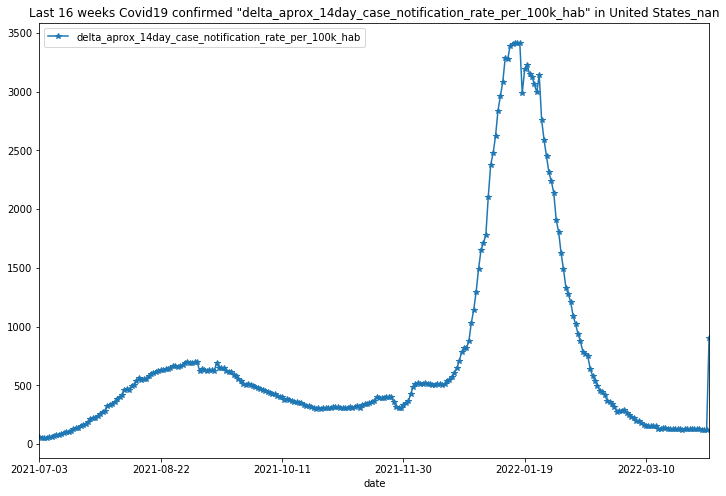

In [34]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

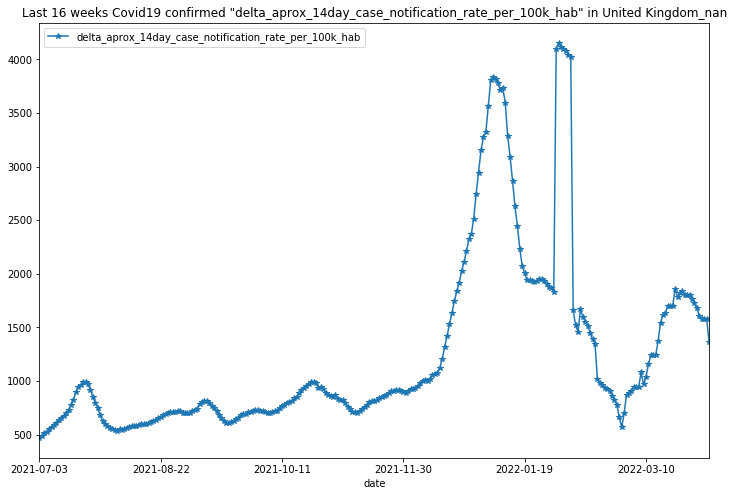

In [35]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

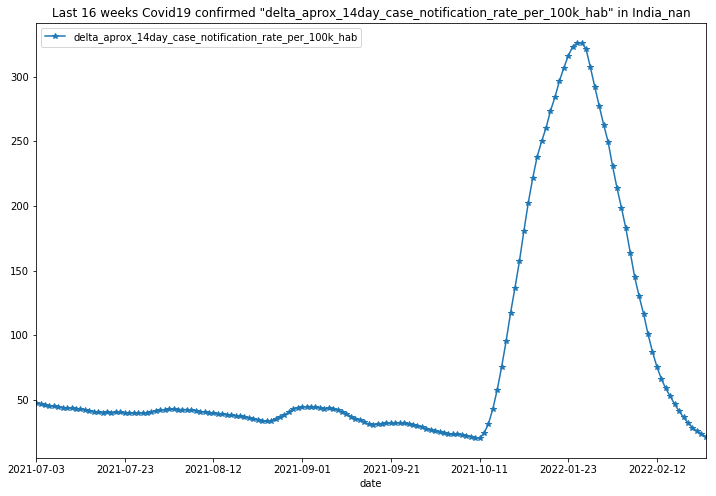

In [36]:
region='India_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

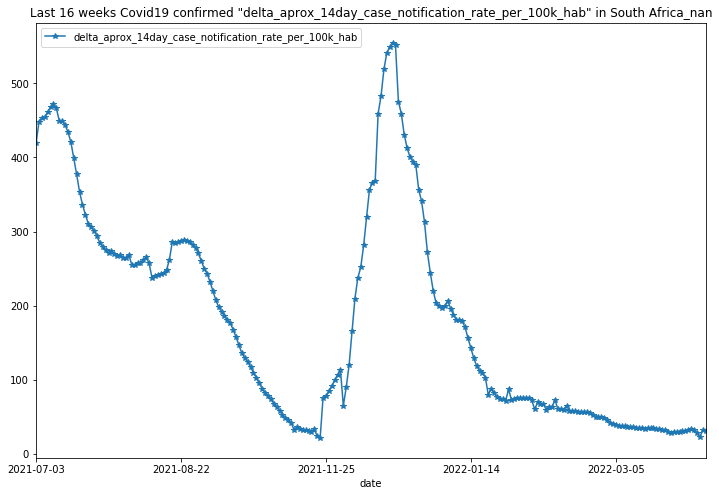

In [37]:
region='South Africa_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

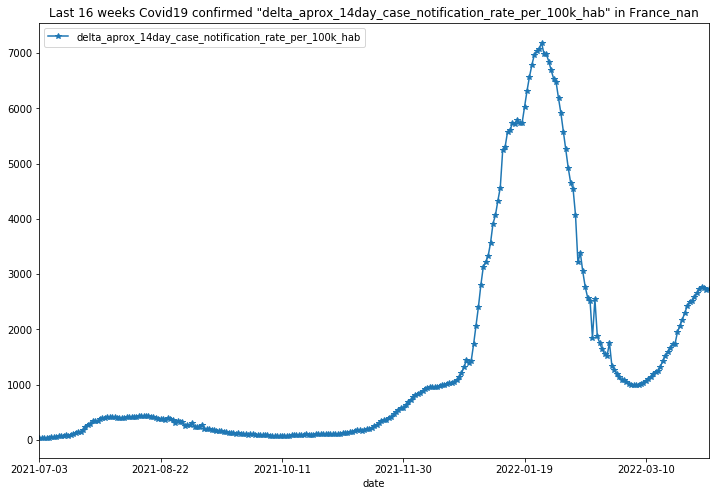

In [38]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

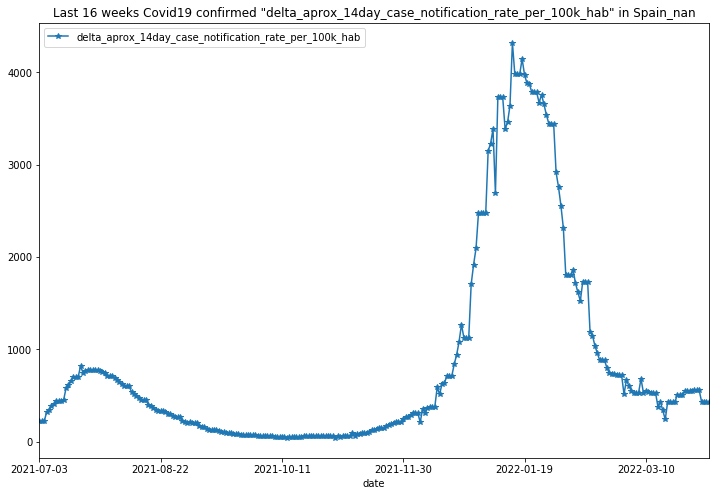

In [39]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

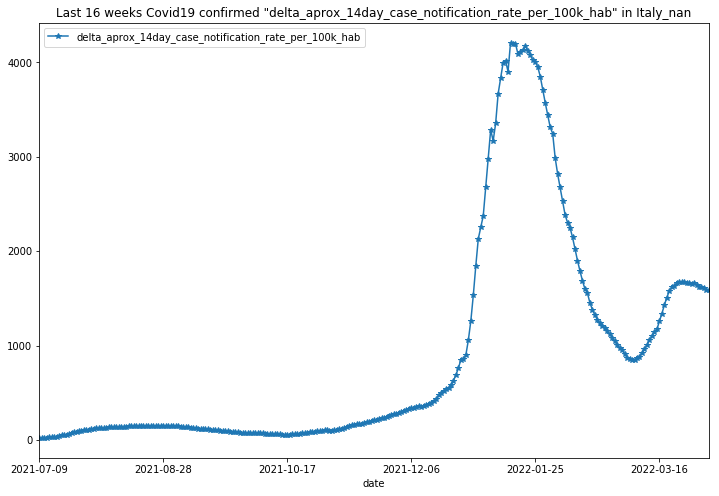

In [40]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

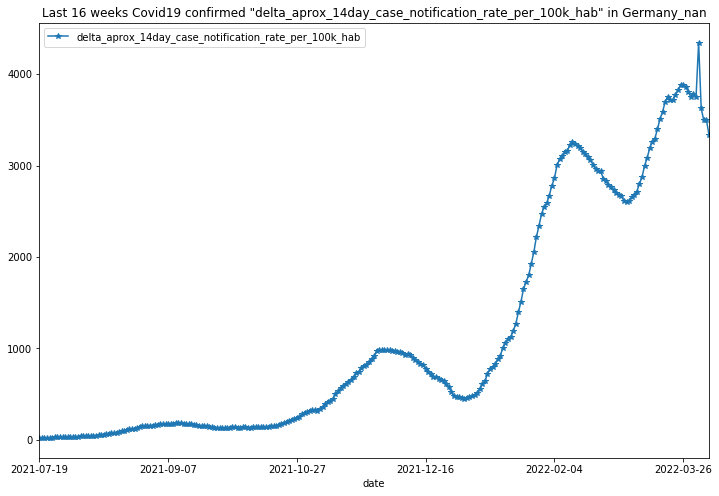

In [41]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

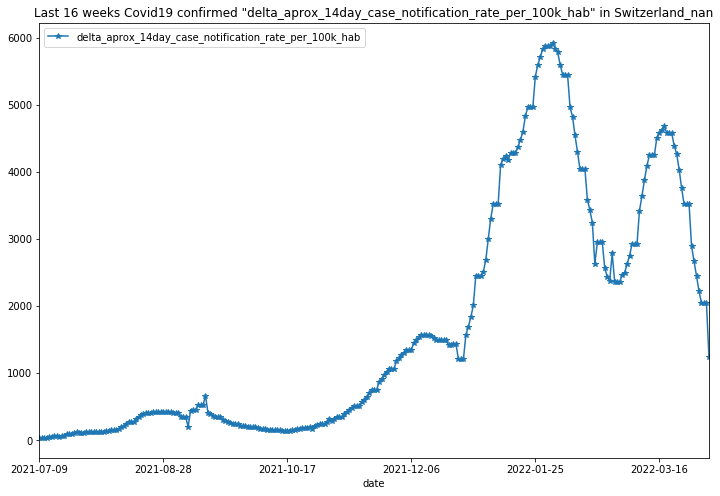

In [42]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

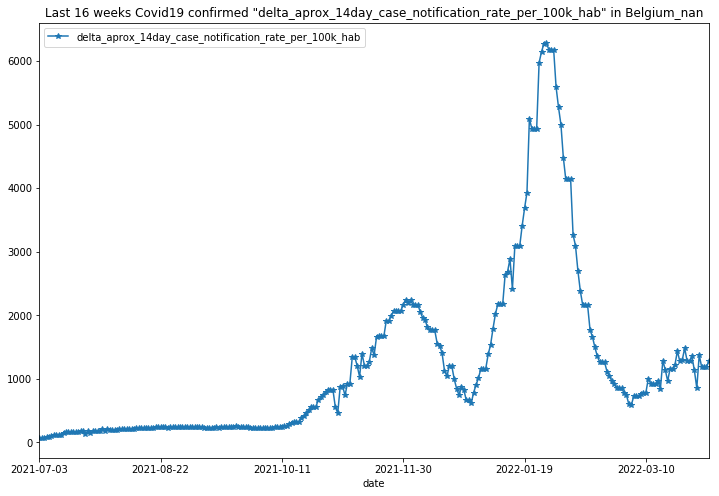

In [43]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

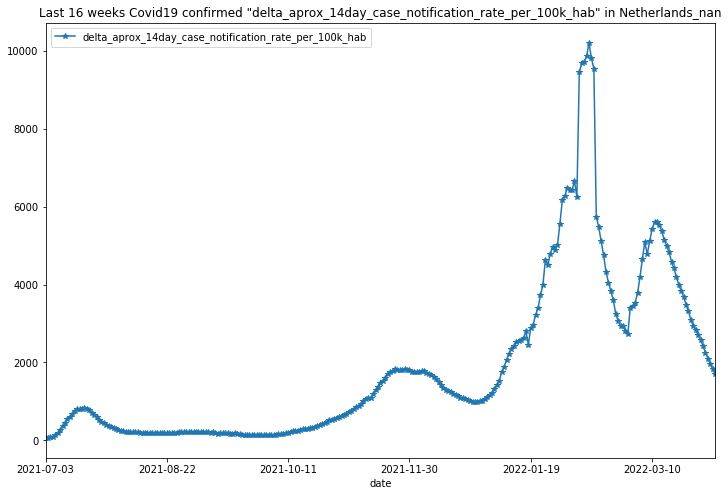

In [44]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

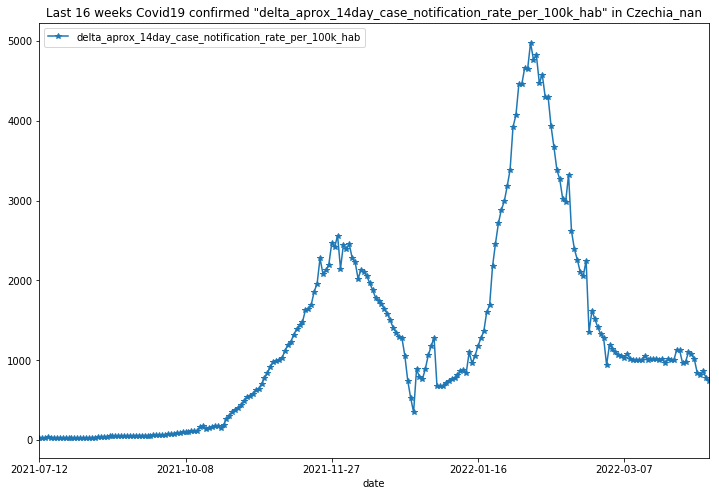

In [45]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

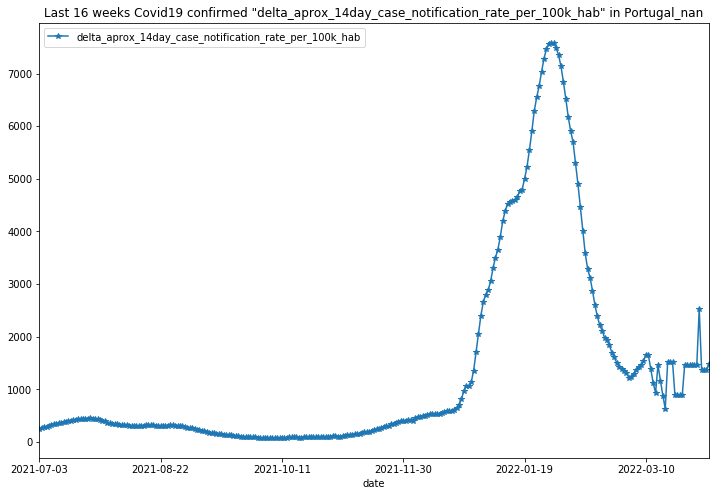

In [46]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [47]:
#%matplotlib notebook
%matplotlib inline

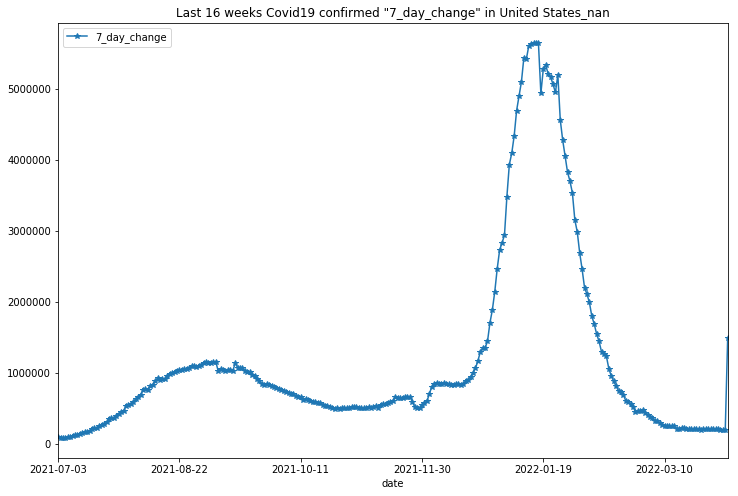

In [48]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

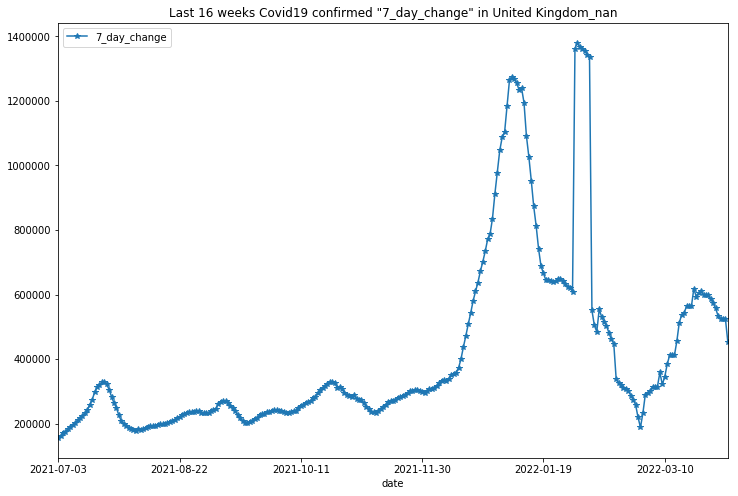

In [49]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

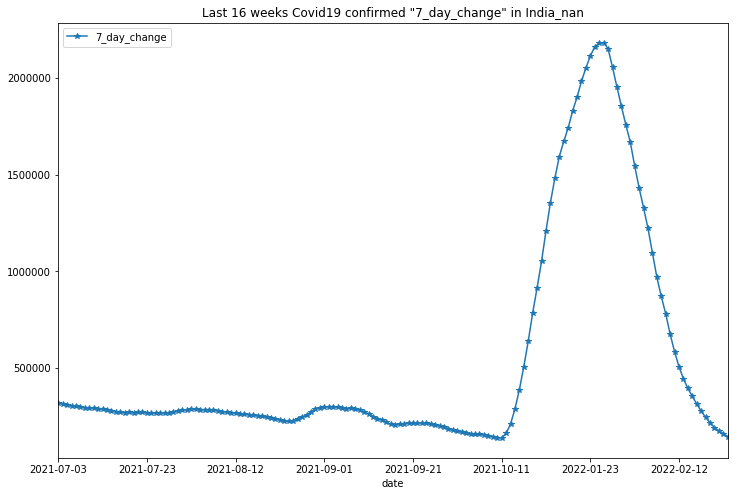

In [50]:
region='India_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

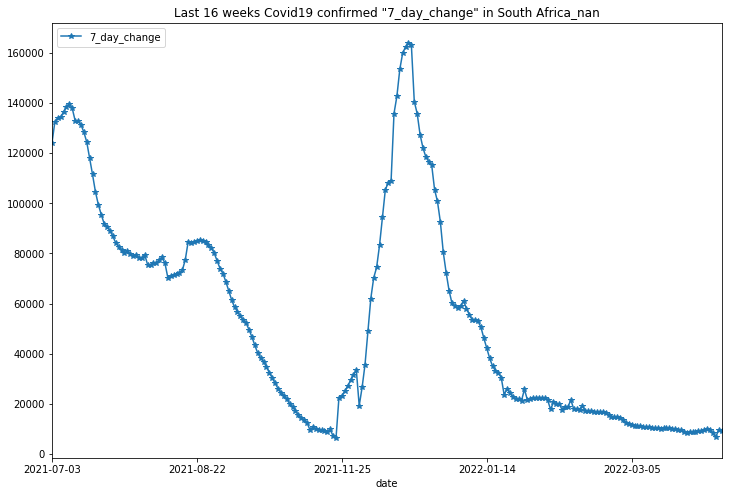

In [51]:
region='South Africa_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

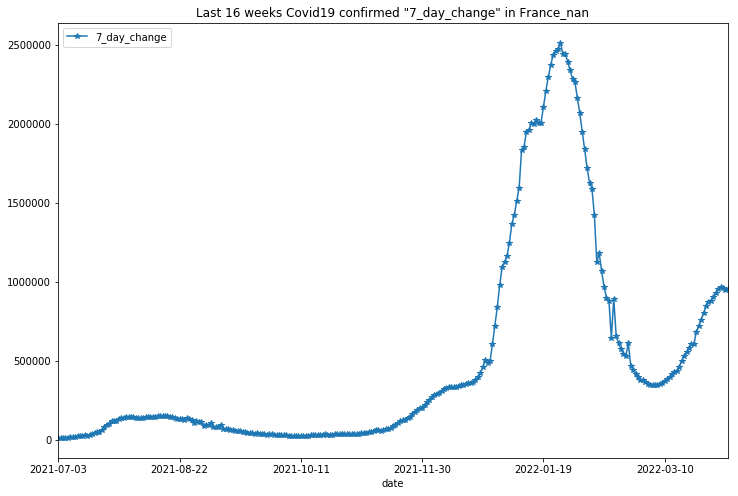

In [52]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

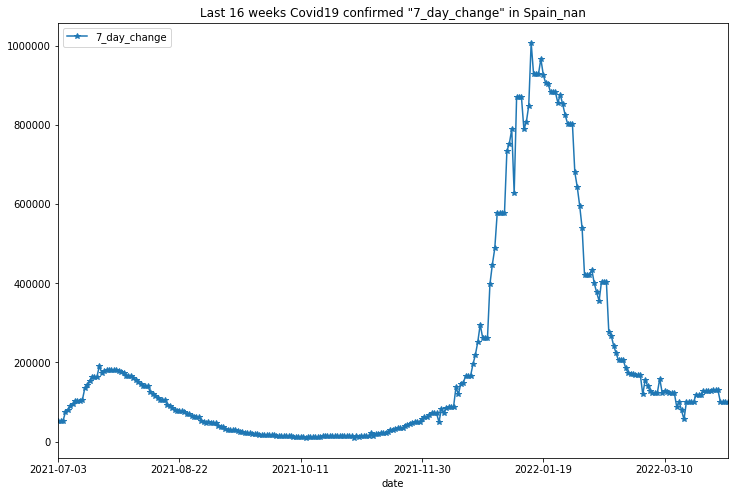

In [53]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

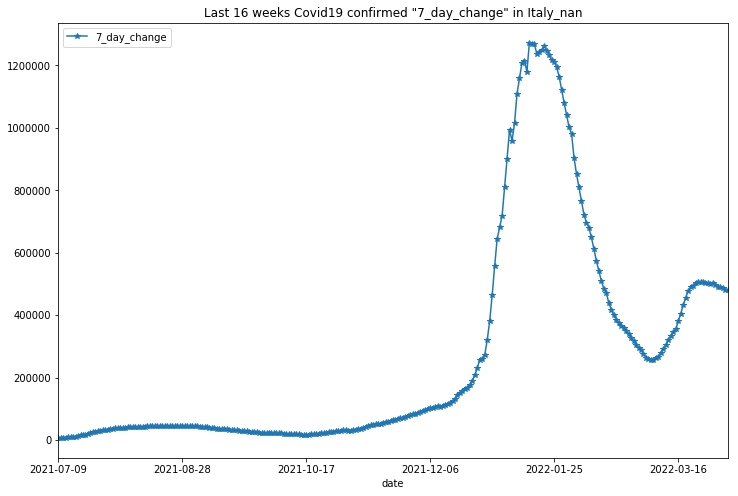

In [54]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

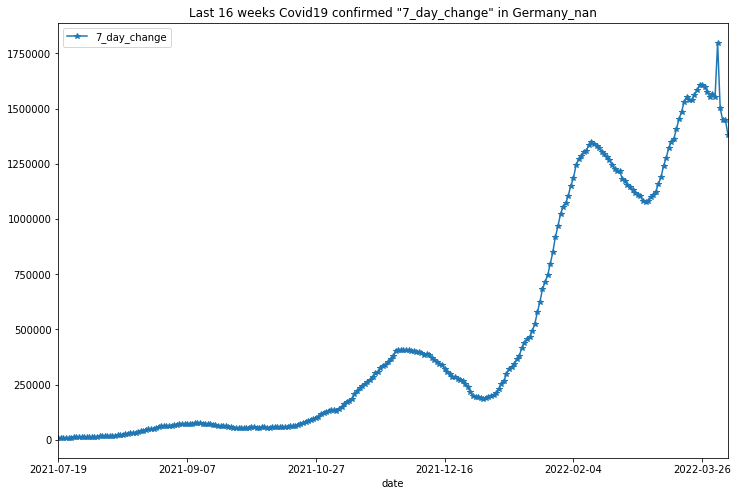

In [55]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

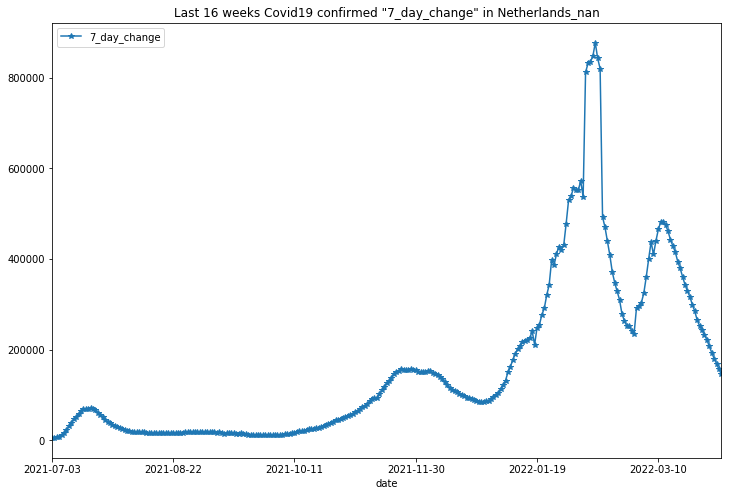

In [56]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

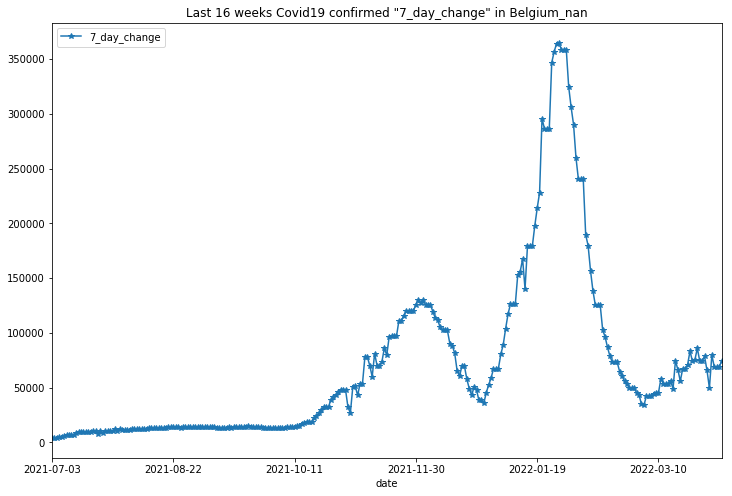

In [57]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

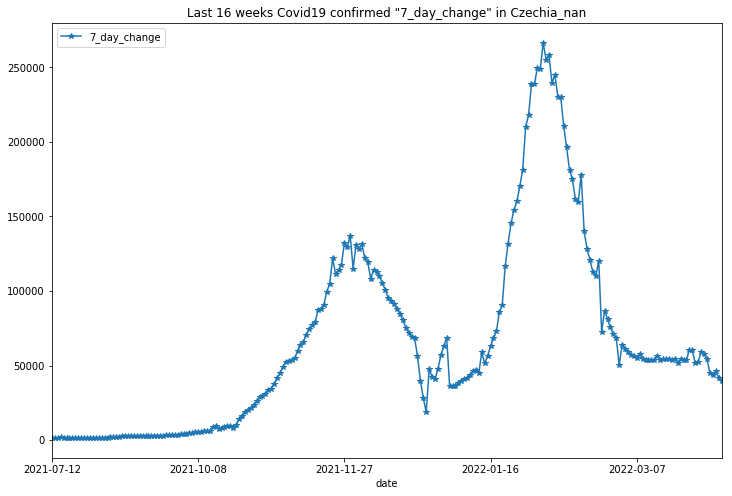

In [58]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

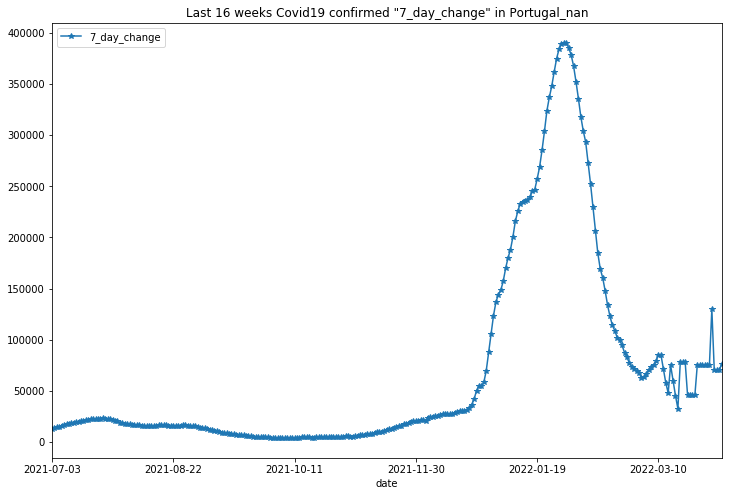

In [59]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [60]:
%matplotlib notebook
#%matplotlib inline

In [61]:
%matplotlib notebook
#%matplotlib inline

In [62]:
%matplotlib notebook
#%matplotlib inline

In [63]:
# Warm-Up
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>

In [64]:
%matplotlib notebook
#%matplotlib inline

In [65]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>

In [66]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>

In [67]:
region='India_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>

In [68]:
region='South Africa_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>

In [69]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>

In [70]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>

In [71]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>

In [72]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>

In [73]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>

In [74]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>

In [75]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>

In [76]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>

In [77]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>

In [78]:
print("Validation Analysis "+anltdate+" : 1day-Forecast and last 16 weeks plot for https://FuelBigData.com/blog is done!")

Validation Analysis 2022-04-05 : 1day-Forecast and last 16 weeks plot for https://FuelBigData.com/blog is done!


In [79]:
import os
os.system("sleep 5")

0

In [80]:
exit()